In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
import calendar

In [5]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')


In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [10]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
df["State"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [12]:
df.groupby("Region").size()

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [13]:
reg = df.groupby(['Region'])[['EUR','EE','ELPR']].mean()
reg

,EUR,EE,ELPR
Region,,,
East,13.916000,1.960237e+07,40.108750
North,15.889620,1.307249e+07,38.702658
Northeast,10.950263,3.617106e+06,52.055263
South,10.454667,1.404059e+07,40.436167
West,8.239000,1.862351e+07,41.257000


In [14]:
heat_maps = df[['EUR','EE', 'ELPR',]]
heat_maps.head()


,EUR,EE,ELPR
0,5.48,16635535,41.02
1,5.83,16545652,40.90
2,5.79,15881197,39.18
3,20.51,11336911,33.10
4,17.43,12988845,36.46


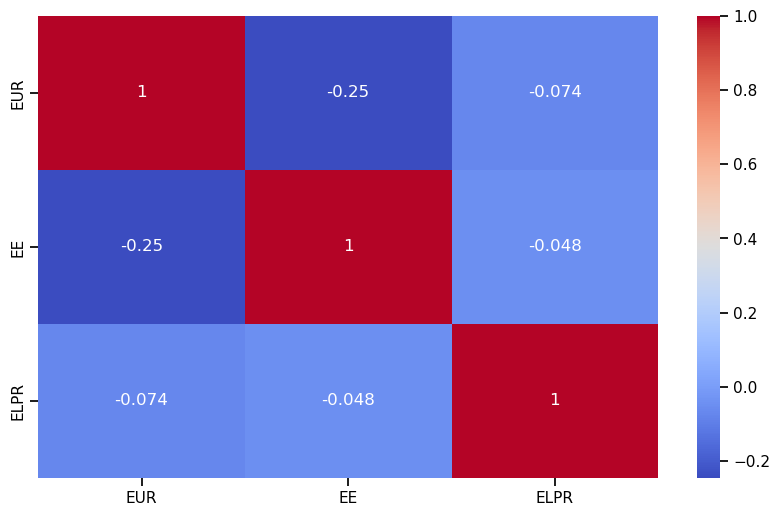

In [15]:
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='coolwarm');

<Axes: title={'center': 'Unemployment Rate'}, xlabel='EUR', ylabel='Count'>

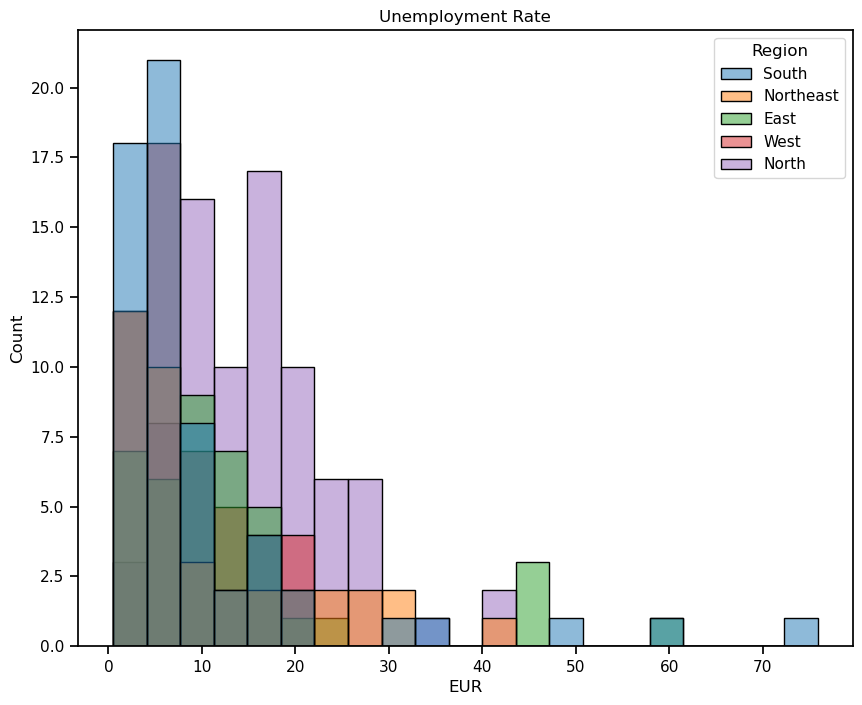

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)


<Axes: xlabel='Region', ylabel='count'>

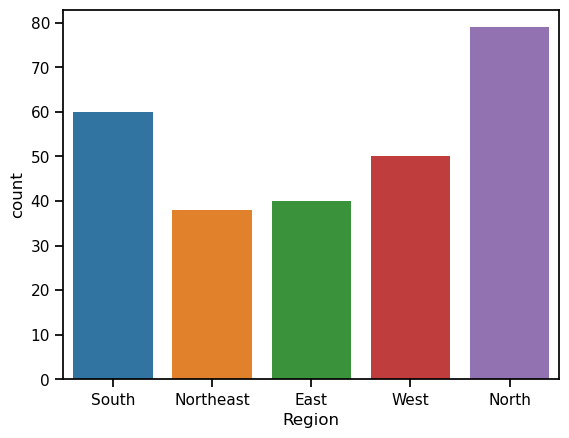

In [17]:
sns.countplot(x='Region',data=df)

<Axes: xlabel='EUR', ylabel='ELPR'>

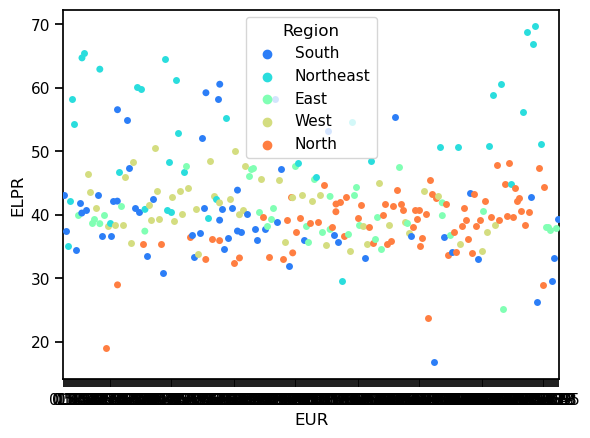

In [18]:
sns.stripplot(x="EUR", y="ELPR",hue="Region", data=df,palette='rainbow')

Text(0.5, 1.0, 'pairplot')

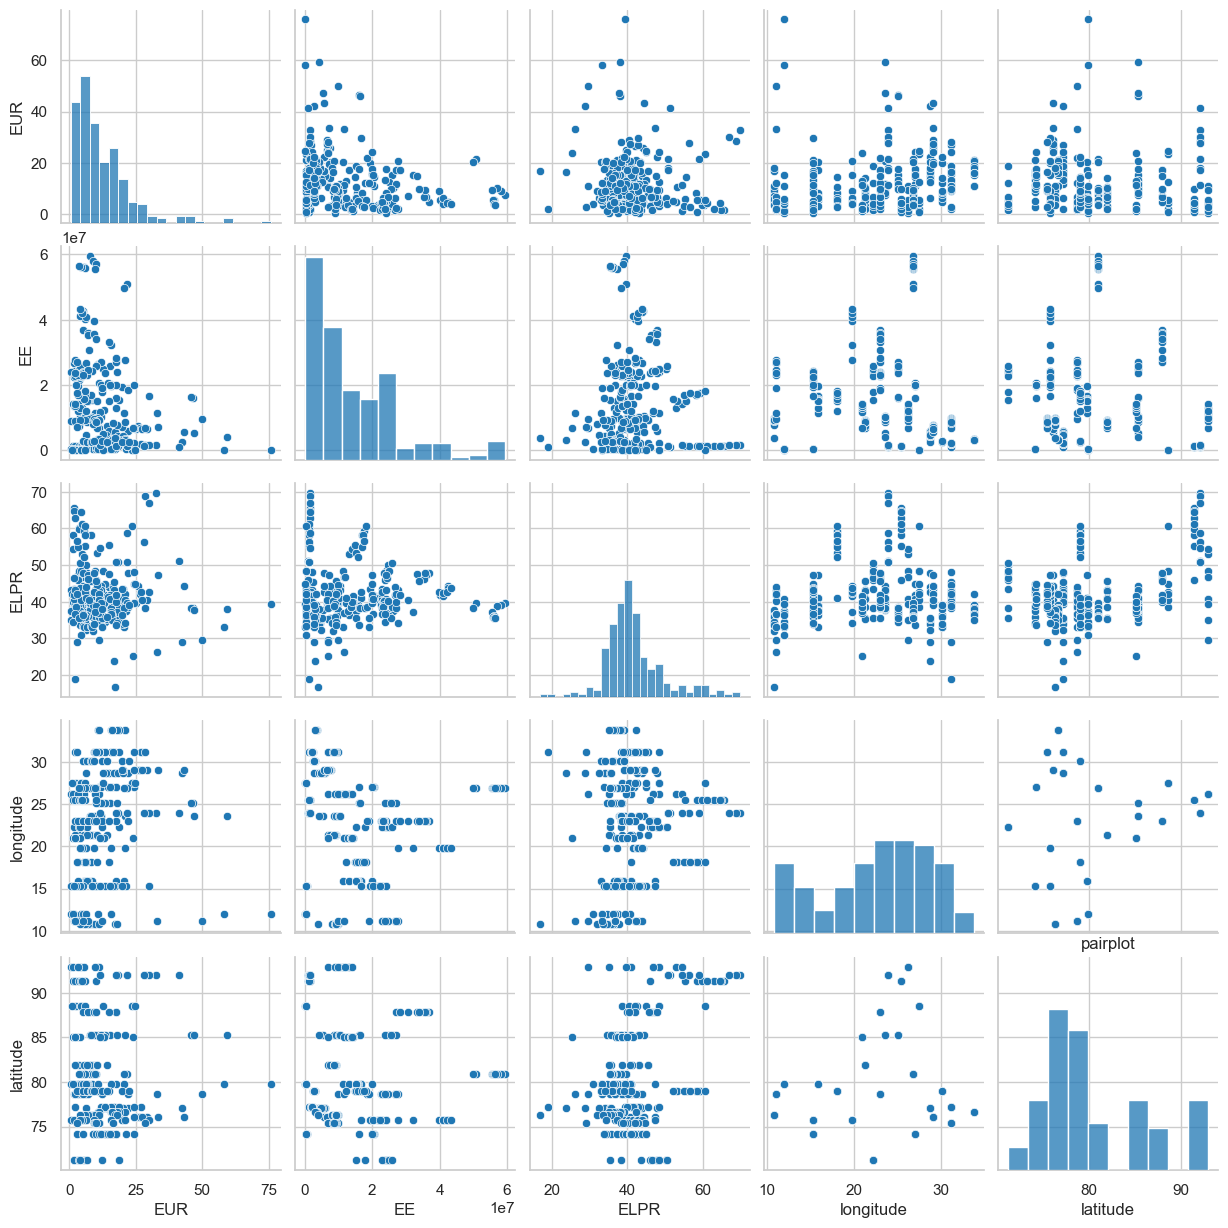

In [19]:
sns.set_style('whitegrid')
sns.pairplot(data=df)
plt.title("pairplot")

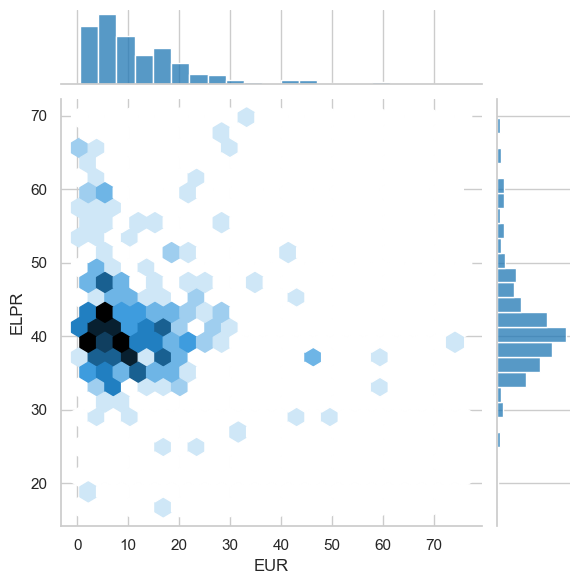

In [20]:
sns.set_style('whitegrid')
sns.jointplot(x='EUR',y='ELPR',data=df,kind='hex')

In [21]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
import cufflinks as cf

In [23]:
init_notebook_mode(connected=True)

In [24]:
cf.go_offline()

In [25]:
df.iplot(kind='scatter',x='EUR',y='ELPR',mode='markers',size=10)

In [26]:
reg.iplot(kind='surface',colorscale='rdylbu')

In [27]:
heat_maps.iplot(kind='box')

In [28]:
heat_maps.iplot(kind='spread',colorscale='rdylbu')

C:\Users\Rasagna\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\Rasagna\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



Text(0.5, 1.0, 'est unemploy rate by region')

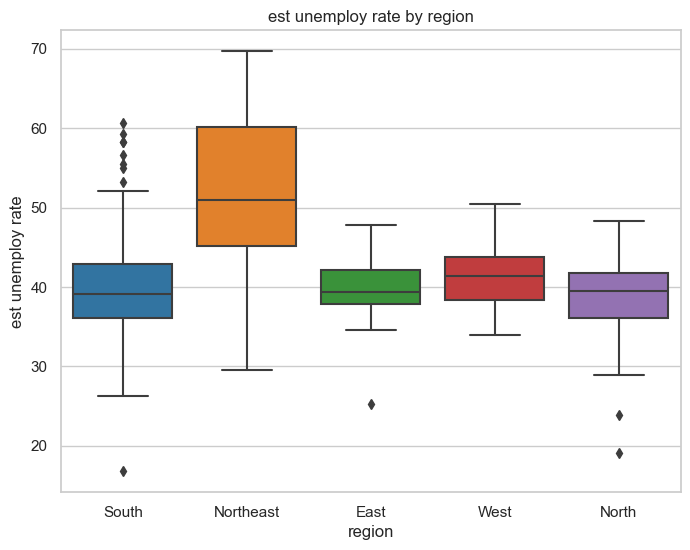

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Region",y="ELPR",data=df)
plt.xlabel("region")
plt.ylabel("est unemploy rate")
plt.title("est unemploy rate by region")